# Doctor's Consultation Fees Prediction

We have all been in situation where we go to a doctor in emergency and find that the consultation fees are too high. As a data scientist we all should do better. What if you have data that records important details about a doctor and you get to build a model to predict the doctor’s consulting fee.? This is the use case that let's you do that.

FEATURES:

Qualification: Qualification and degrees held by the doctor

Experience: Experience of the doctor in number of years

Rating: Rating given by patients

Profile: Type of the doctor

Miscellaneous_Info: Extra information about the doctor

Fees: Fees charged by the doctor (Target Variable)

Place: Area and the city where the doctor is located.

# Loading libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt              #for plotting and EDA
import seaborn as sns                        #for plotting and Eda
from sklearn.model_selection import train_test_split         #for splitting dataset into train and test
from sklearn.metrics import r2_score                         #for model evaluation
from sklearn.metrics import mean_squared_error               #for model evaluation
from sklearn.metrics import mean_absolute_error              #for checking model accuracy
from sklearn.linear_model import LinearRegression            #regression model
from sklearn.tree import DecisionTreeRegressor               #regression model
from sklearn.ensemble import RandomForestRegressor           #regression model
from sklearn.model_selection import cross_val_score          #for cross validating model
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_excel('Doc_Fees_Train.xlsx')
test = pd.read_excel('Doc_Fees_Test.xlsx')

In [3]:
train.head(10)

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
5,BAMS,8 years experience,NaN,"Porur, Chennai",Ayurveda,NaN,100
6,BHMS,42 years experience,NaN,"Karol Bagh, Delhi",Homeopath,NaN,200
7,BDS,10 years experience,99%,"Arekere, Bangalore",Dentist,Dental Fillings Crowns and Bridges Fixing Impa...,200
8,"MBBS, MD - General Medicine",14 years experience,NaN,"Old City, Hyderabad",General Medicine,NaN,100
9,"BSc, BDS",23 years experience,NaN,"Athani, Ernakulam",Dentist,NaN,100


In [4]:
test.head(10)

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...
5,"BDS, MDS",14 years experience,90%,"Velachery, Chennai",Dentist,Acrylic Partial Denture Impaction / Impacted T...
6,"MBBS, Diploma in Otorhinolaryngology (DLO)",23 years experience,94%,"Frazer Town, Bangalore",ENT Specialist,"94% 6 Feedback Frazer Town, Bangalore"
7,"BDS, MDS - Pedodontics",9 years experience,94%,"Attapur, Hyderabad",Dentist,RCT - Root Canal Treatment Ceramic Veneers / C...
8,"MD - Ayurveda Medicine, BAMS, Yoga Teachers Tr...",11 years experience,99%,"Banashankari, Bangalore",Ayurveda,"99% 203 Feedback Banashankari, Bangalore"
9,BHMS,44 years experience,NaN,"Mayur Vihar Ph-I, Delhi",Homeopath,NaN


In [5]:
train.shape, test.shape

((5961, 7), (1987, 6))

# Merging the train and test dataset for data cleaning

Since we have separate train and test datasets, we will approach it by first merging the two datasets into one for exploring and cleaning the data, after all that process we will separate the datasets back to train and test as they were provided.

In [6]:
train['source']='train'
test['source']='test'
df = pd.concat([train, test],ignore_index=True)
train.shape, test.shape, df.shape

((5961, 8), (1987, 7), (7948, 8))

We introduce another column in the two datasets namely 'source', so it will be easy for us to separate the two datasets after data cleaning.

In [7]:
df.dtypes

Qualification          object
Experience             object
Rating                 object
Place                  object
Profile                object
Miscellaneous_Info     object
Fees                  float64
source                 object
dtype: object

In [8]:
df.apply(lambda x: len(x.unique()))

Qualification         1801
Experience              64
Rating                  53
Place                  949
Profile                  6
Miscellaneous_Info    3981
Fees                    41
source                   2
dtype: int64

# Checking and treating missing values

In [9]:
df.isnull().sum()

Qualification            0
Experience               0
Rating                4392
Place                   31
Profile                  0
Miscellaneous_Info    3454
Fees                  1987
source                   0
dtype: int64

In [10]:
df['Place'].fillna('Unknown, Unknown', inplace = True)

In [11]:
df.drop('Miscellaneous_Info', axis = 1, inplace = True)

In [12]:
df['Rating'].fillna('0%', inplace = True)

In [13]:
df.isnull().sum()

Qualification       0
Experience          0
Rating              0
Place               0
Profile             0
Fees             1987
source              0
dtype: int64

# Feature Engineering

First we will focus on the experience column and extract the numeric data from it.

In [14]:
df['Exp'] = df['Experience'].apply(lambda x: x[:-17])
df['Exp'] = df['Exp'].astype(float)
df['Exp']

0       24.0
1       12.0
2        9.0
3       12.0
4       20.0
        ... 
7943    10.0
7944     4.0
7945     9.0
7946    12.0
7947     8.0
Name: Exp, Length: 7948, dtype: float64

In [15]:
df['Place'] = df['Place'].str.split(", ")
df['City'] = df['Place'].str[-1]
df['Place'] = df['Place'].str[0]

The values in the place column are of the format - "Area, City", we have made a new column from this data named city.

In [16]:
df.apply(lambda x: len(x.unique()))

Qualification    1801
Experience         64
Rating             53
Place             938
Profile             6
Fees               41
source              2
Exp                64
City               10
dtype: int64

In [17]:
df.isnull().sum()

Qualification       0
Experience          0
Rating              0
Place               0
Profile             0
Fees             1987
source              0
Exp                 0
City                0
dtype: int64

In [18]:
df['Qualification'].value_counts()[:30]

BDS                                                      632
BHMS                                                     627
BAMS                                                     624
MBBS                                                     441
MBBS, MS - ENT                                           280
MBBS, MD - Dermatology                                   242
MBBS, MD - General Medicine                              227
MBBS, MD - Dermatology , Venereology & Leprosy           193
MBBS, DDVL                                               123
BHMS, MD - Homeopathy                                    120
MBBS, Diploma in Otorhinolaryngology (DLO)               114
BAMS, MD - Ayurveda Medicine                             106
BDS, MDS - Conservative Dentistry & Endodontics           89
MBBS, DDV                                                 81
BDS, MDS                                                  77
BDS, MDS - Oral & Maxillofacial Surgery                   76
MD - Dermatology , Vener

In [19]:
df["Qualification"]=df["Qualification"].str.split(",")
Qualification ={}
for x in df["Qualification"].values:
    for each in x:
        each = each.strip()
        if each in Qualification:
            Qualification[each]+=1
        else:
            Qualification[each]=1

In [20]:
most_qua = sorted(Qualification.items(),key=lambda x:x[1],reverse=True)[:10]
final_qua =[]
for tup in most_qua:
    final_qua.append(tup[0])

In [21]:
for title in final_qua:
    df[title]=0
    
for x,y in zip(df["Qualification"].values,np.array([idx for idx in range(len(df))])):
    for q in x:
        q = q.strip()
        if q in final_qua:
            df[q][y] = 1
            
df.drop("Qualification",axis=1,inplace=True)

There was no proper structure in which the values of qualification columns were filled. Most of the values were repeated. The values in the cells were separated by commas, so we split the values based on commas and then made a dictionary from it. Then we selected the top 10 keys from the dictionary and made new columns in the dataset which took in bool values.

In [22]:
df.head()

,Experience,Rating,Place,Profile,Fees,source,Exp,City,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,24 years experience,100%,Kakkanad,Homeopath,100.0,train,24.0,Ernakulam,0,0,0,1,0,0,0,0,0,1
1,12 years experience,98%,Whitefield,Ayurveda,350.0,train,12.0,Bangalore,0,0,1,0,0,0,0,0,0,0
2,9 years experience,0%,Mathikere - BEL,ENT Specialist,300.0,train,9.0,Bangalore,1,0,0,0,0,0,0,0,0,0
3,12 years experience,0%,Bannerghatta Road,Ayurveda,250.0,train,12.0,Bangalore,0,0,1,0,0,0,0,0,0,0
4,20 years experience,100%,Keelkattalai,Ayurveda,250.0,train,20.0,Chennai,0,0,1,0,0,0,0,0,0,0


In [23]:
df.isnull().sum()

Experience                                 0
Rating                                     0
Place                                      0
Profile                                    0
Fees                                    1987
source                                     0
Exp                                        0
City                                       0
MBBS                                       0
BDS                                        0
BAMS                                       0
BHMS                                       0
MD - Dermatology                           0
MS - ENT                                   0
Venereology & Leprosy                      0
MD - General Medicine                      0
Diploma in Otorhinolaryngology (DLO)       0
MD - Homeopathy                            0
dtype: int64

In [24]:
df.dtypes

Experience                               object
Rating                                   object
Place                                    object
Profile                                  object
Fees                                    float64
source                                   object
Exp                                     float64
City                                     object
MBBS                                      int64
BDS                                       int64
BAMS                                      int64
BHMS                                      int64
MD - Dermatology                          int64
MS - ENT                                  int64
Venereology & Leprosy                     int64
MD - General Medicine                     int64
Diploma in Otorhinolaryngology (DLO)      int64
MD - Homeopathy                           int64
dtype: object

In [25]:
df['Rating'] = df['Rating'].apply(lambda x: x[:-1])
df['Rating'] = df['Rating'].astype(float)
df['Rating']

0       100.0
1        98.0
2         0.0
3         0.0
4       100.0
        ...  
7943      0.0
7944      0.0
7945      0.0
7946     98.0
7947      0.0
Name: Rating, Length: 7948, dtype: float64

In [26]:
df.drop(['Experience', 'Place'], axis=1,inplace=True)

In [27]:
df.dtypes

Rating                                  float64
Profile                                  object
Fees                                    float64
source                                   object
Exp                                     float64
City                                     object
MBBS                                      int64
BDS                                       int64
BAMS                                      int64
BHMS                                      int64
MD - Dermatology                          int64
MS - ENT                                  int64
Venereology & Leprosy                     int64
MD - General Medicine                     int64
Diploma in Otorhinolaryngology (DLO)      int64
MD - Homeopathy                           int64
dtype: object

We removed the '%' sign from ratings and converted into float type, also we dropped Place from data set because it would have been absurd to encode 900+ unique values.

# EDA and Data Visualisation

In [28]:
df.columns

Index(['Rating', 'Profile', 'Fees', 'source', 'Exp', 'City', 'MBBS', 'BDS',
       'BAMS', 'BHMS', 'MD - Dermatology', 'MS - ENT', 'Venereology & Leprosy',
       'MD - General Medicine', 'Diploma in Otorhinolaryngology (DLO)',
       'MD - Homeopathy'],
      dtype='object')

In [29]:
cate_cols = ['Profile', 'City', 'MBBS', 'BDS', 'BAMS', 'BHMS', 'MD - Dermatology', 'MS - ENT', 'Venereology & Leprosy', 
             'MD - General Medicine', 'Diploma in Otorhinolaryngology (DLO)', 'MD - Homeopathy']
cont_cols = ['Rating', 'Exp', 'Fees']

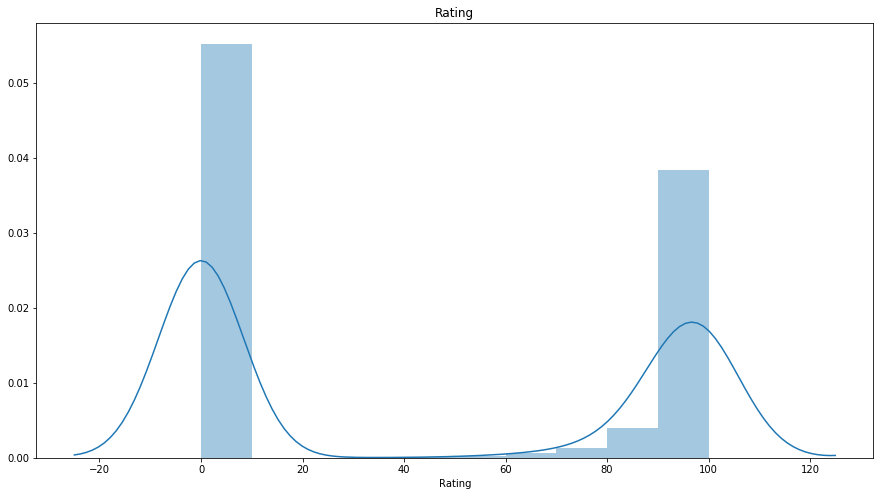

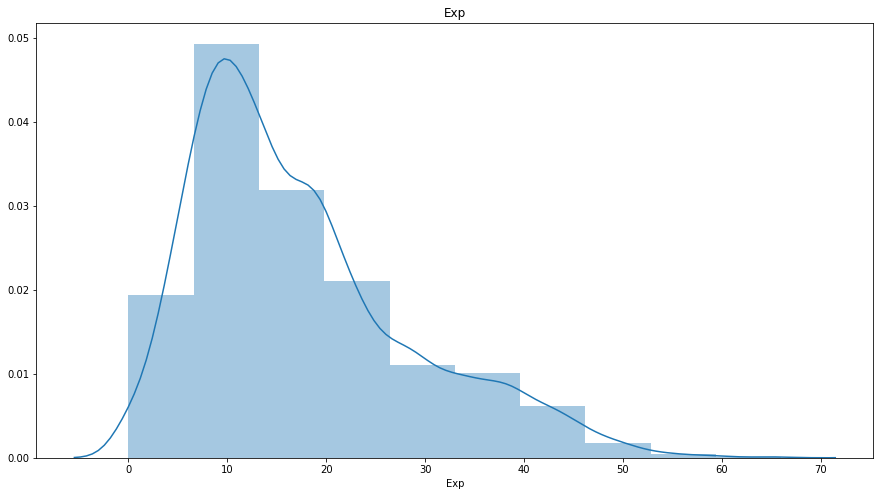

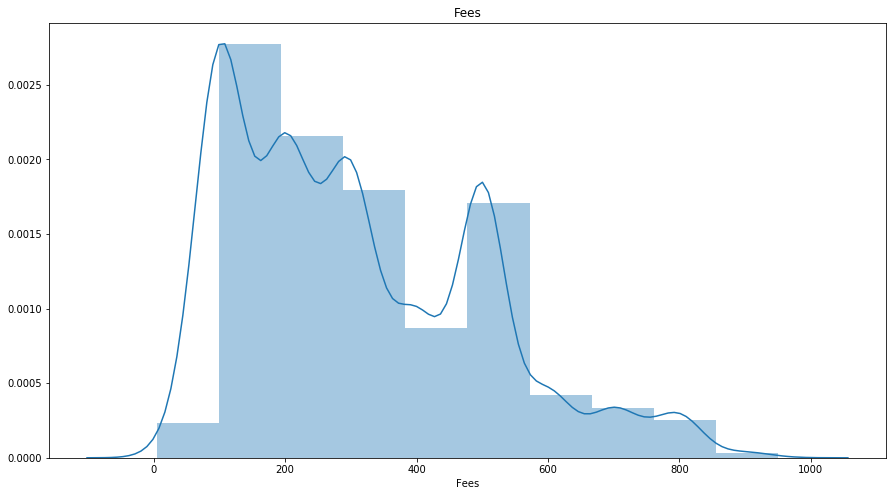

In [30]:
for i in df[cont_cols]:                                 #univariate analysis
    plt.figure(figsize = (15, 8))
    sns.distplot(df[i], bins = 10)
    plt.title(i)
    plt.show()

Most of the ratings are 90 and above.

Most of the doctors have experience of around 10 years.

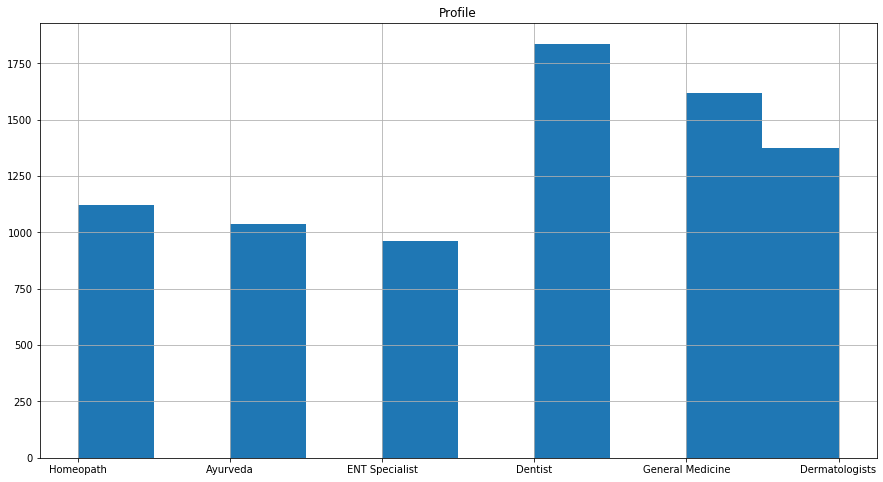

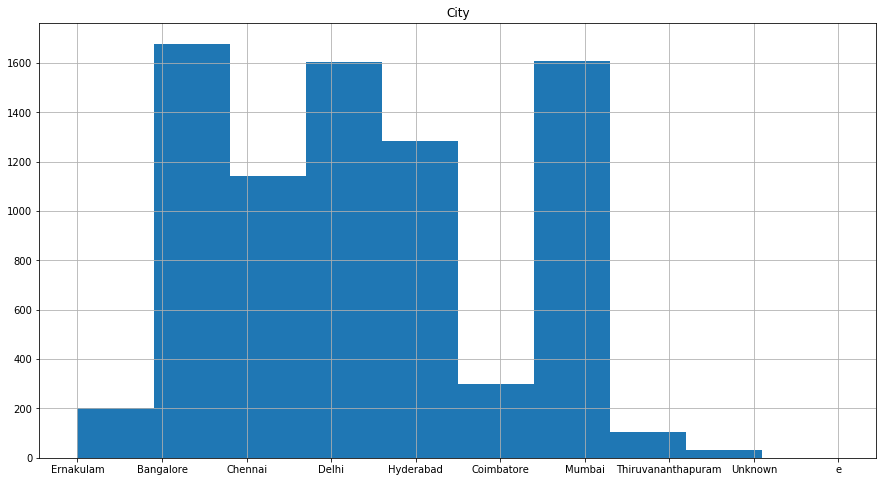

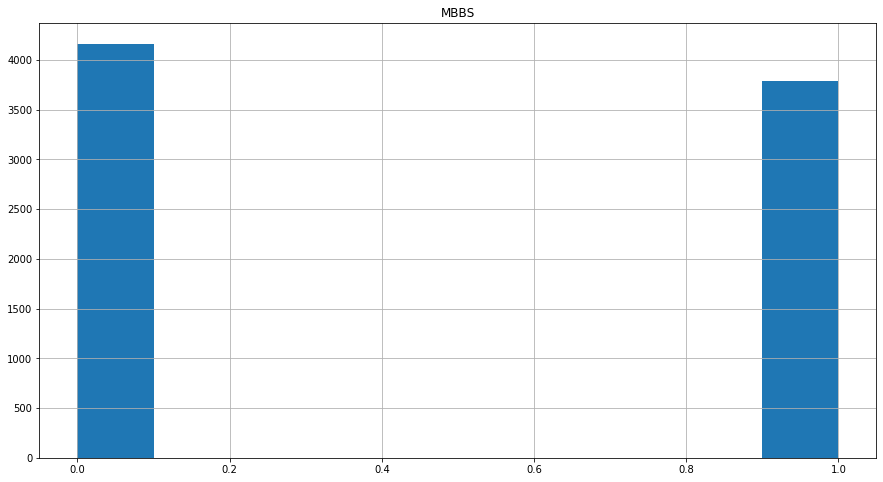

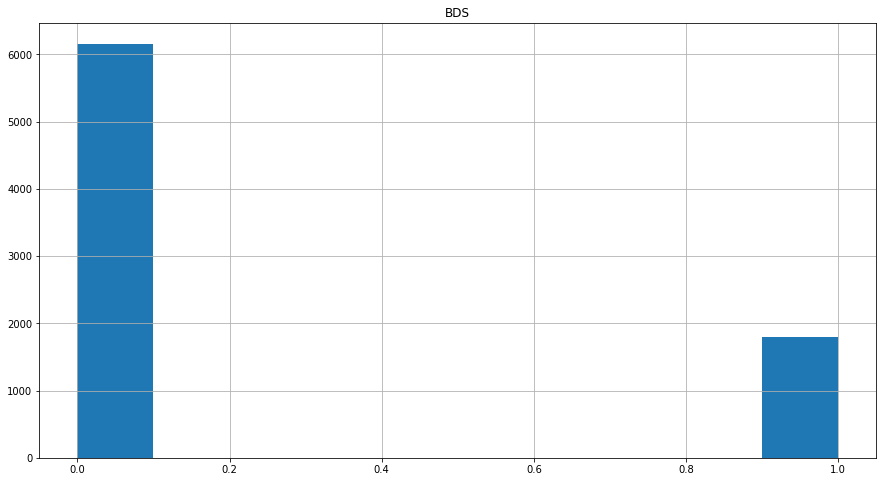

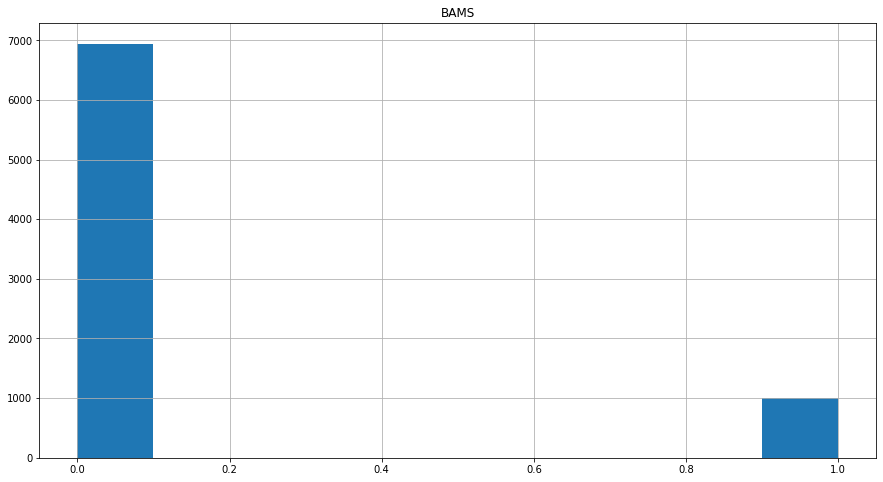

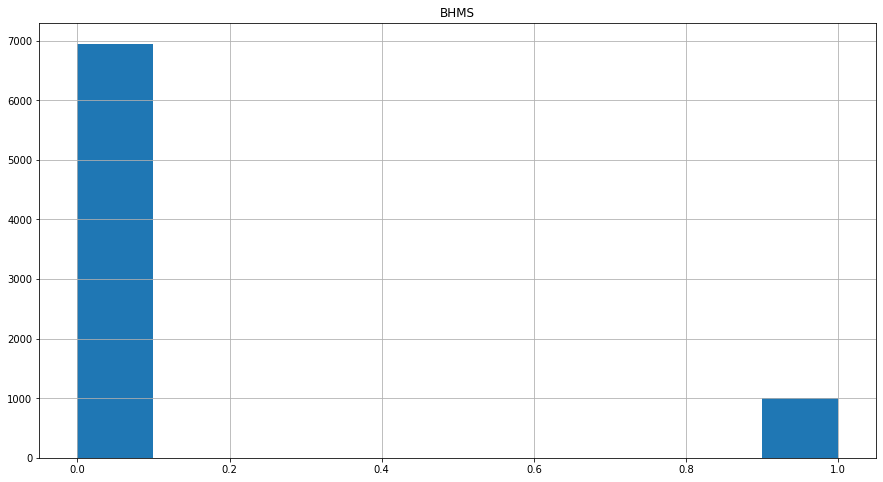

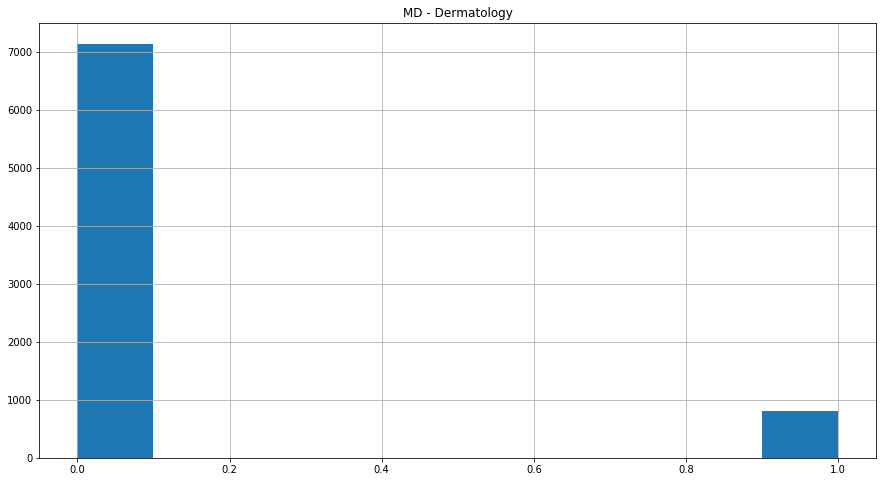

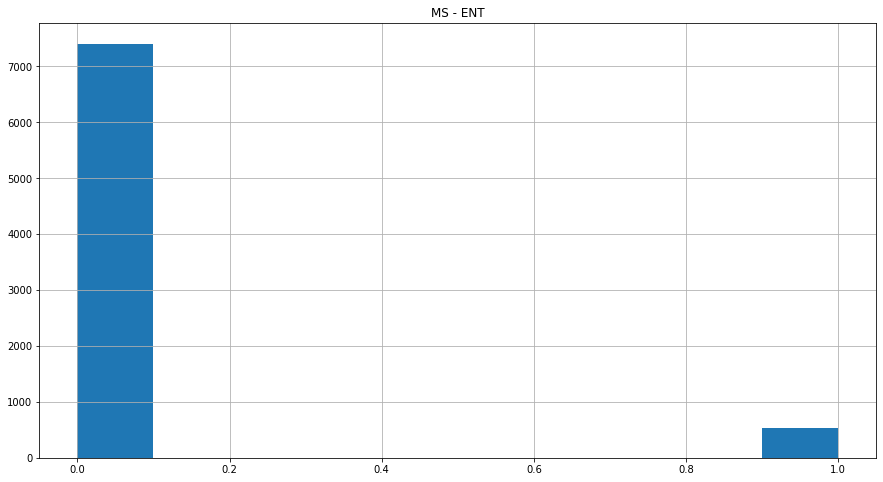

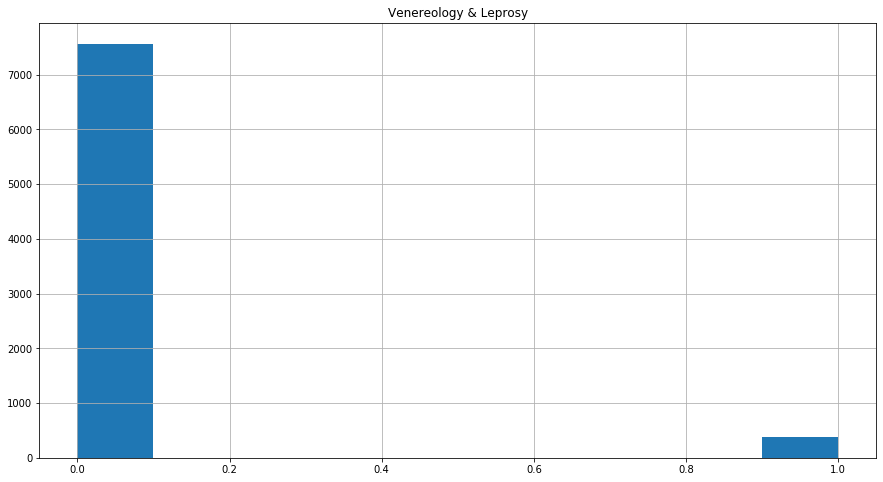

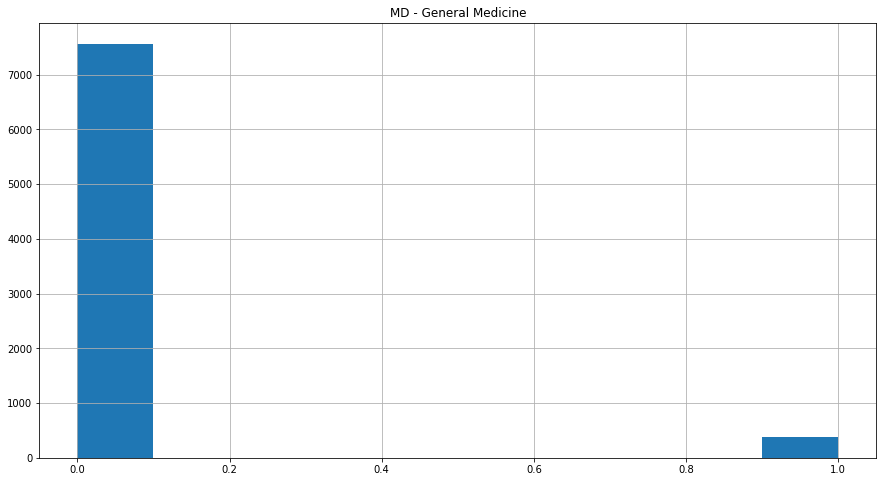

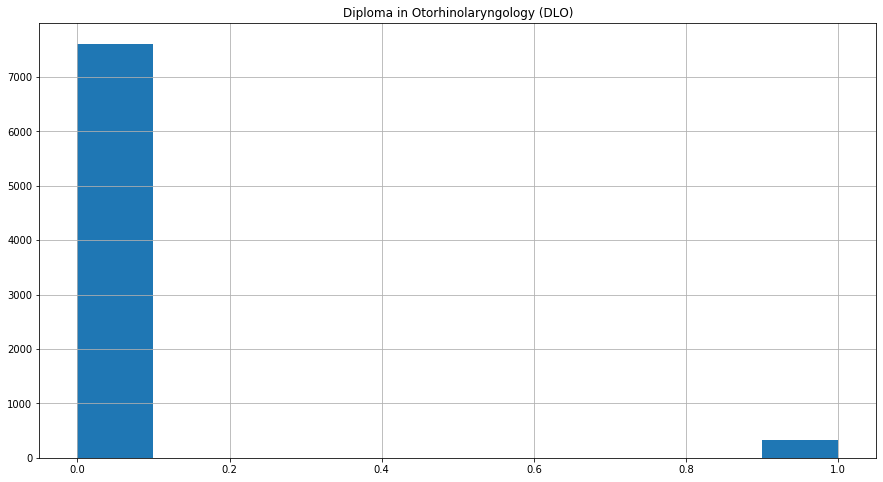

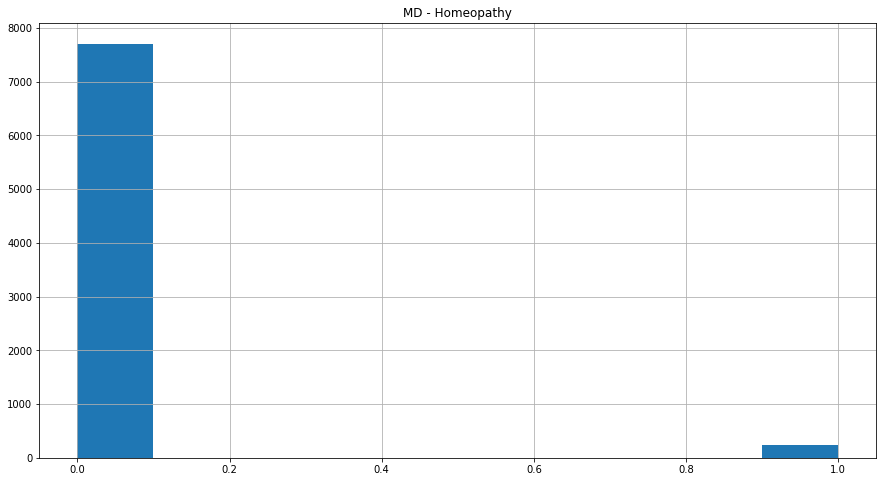

In [31]:
for i in cate_cols:                                 #univariate analysis
    plt.figure(figsize = (15, 8))
    df[i].hist(grid = True)
    plt.title(i)
    plt.show()

In profile graph we can see that Dentist have the highest value count followed by general medicine and dermatologists, and ENT specialist has the lowest count.

Most of the doctors are situated in Bangalore, Delhi and Mumbai.

Majority of doctors have an MBBS degree compared to other degrees.

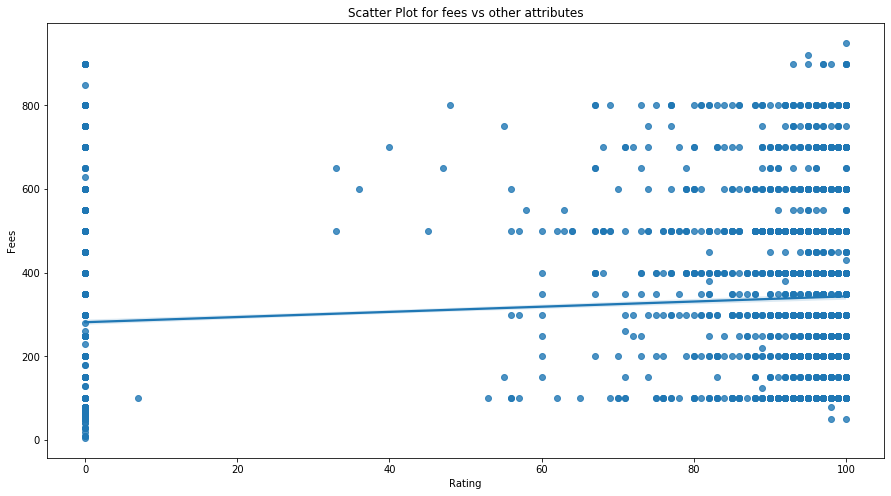

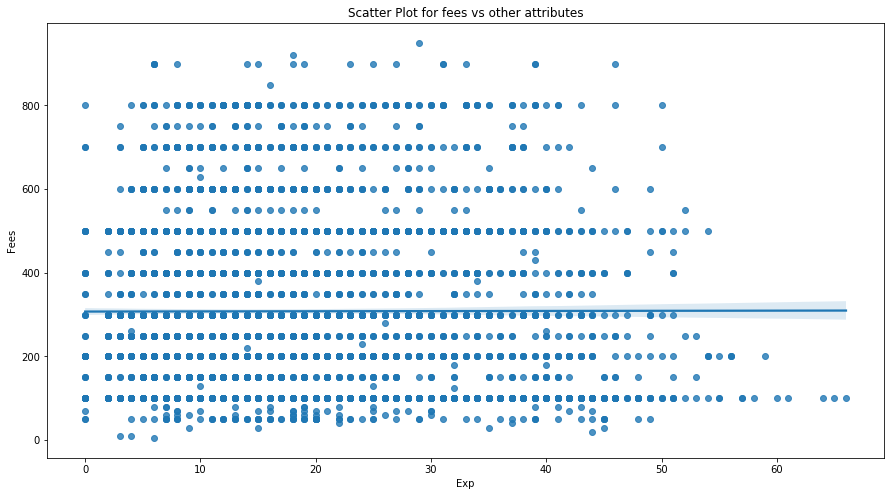

In [32]:
for i in cont_cols[:-1]:                                      #bivariate analysis
    plt.figure(figsize = (15, 8))
    sns.regplot(df[i], df['Fees'])
    plt.title('Scatter Plot for fees vs other attributes')
    plt.xlabel(i)
    plt.ylabel('Fees')  
    plt.show()

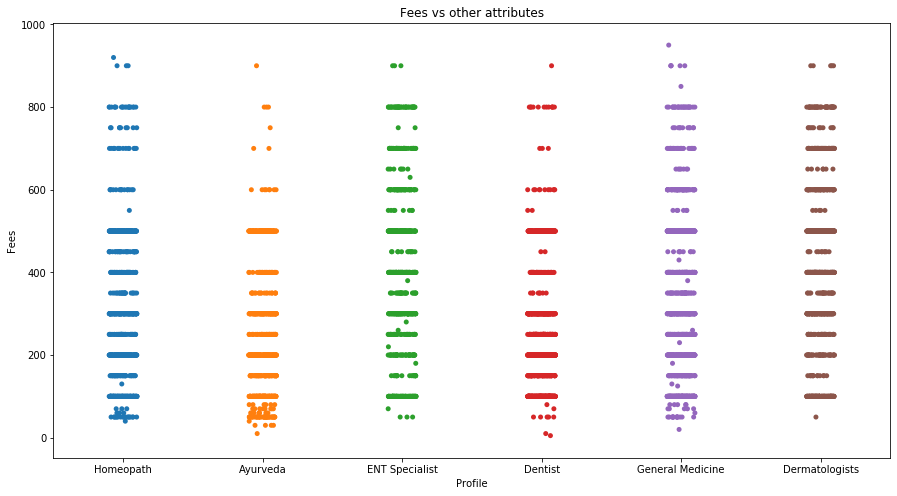

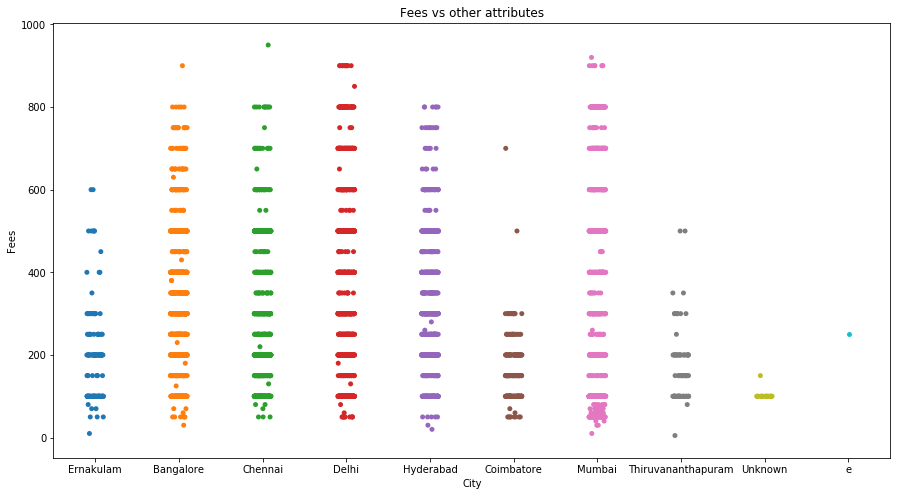

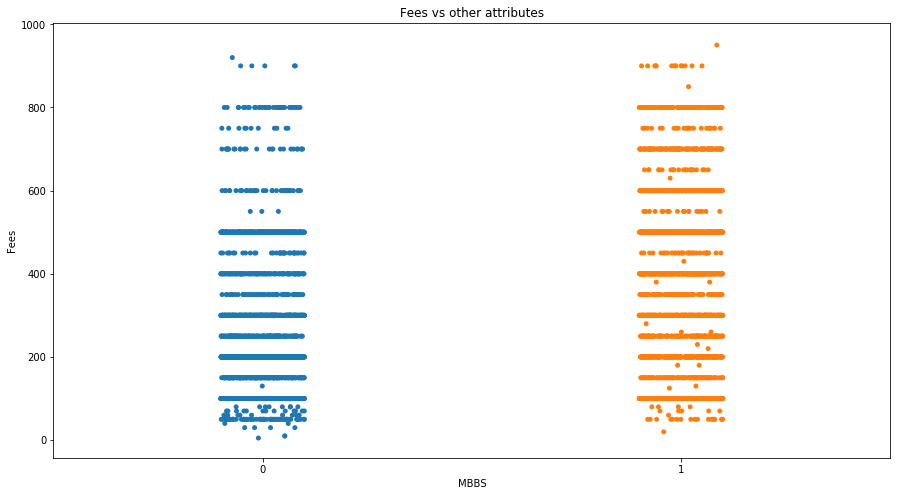

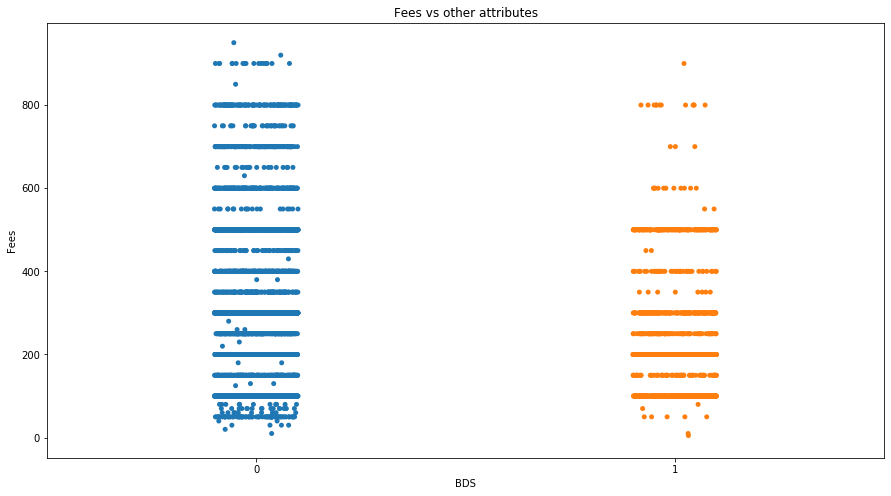

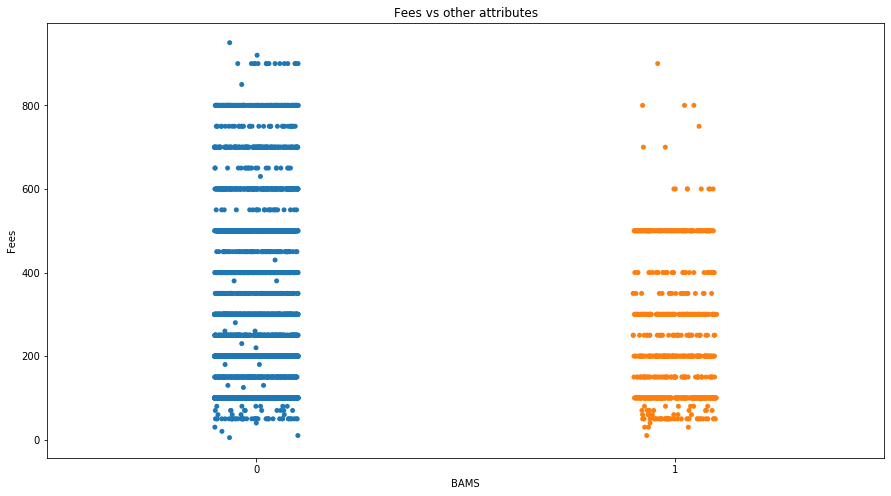

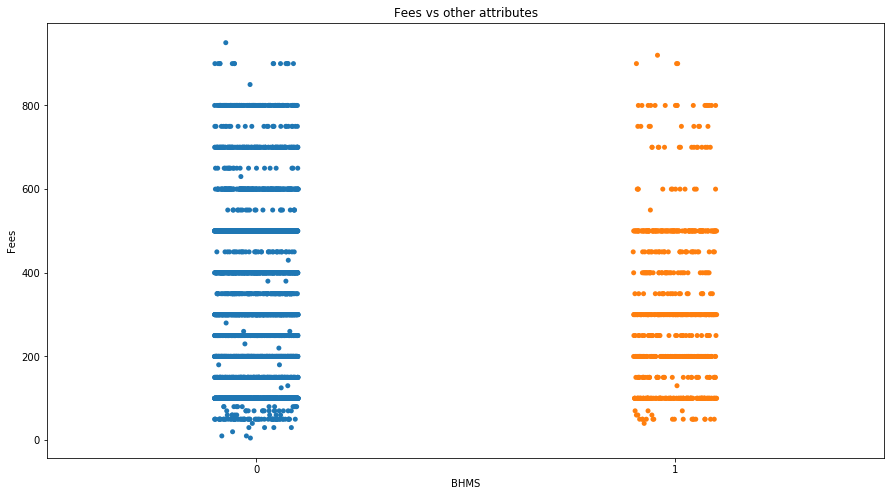

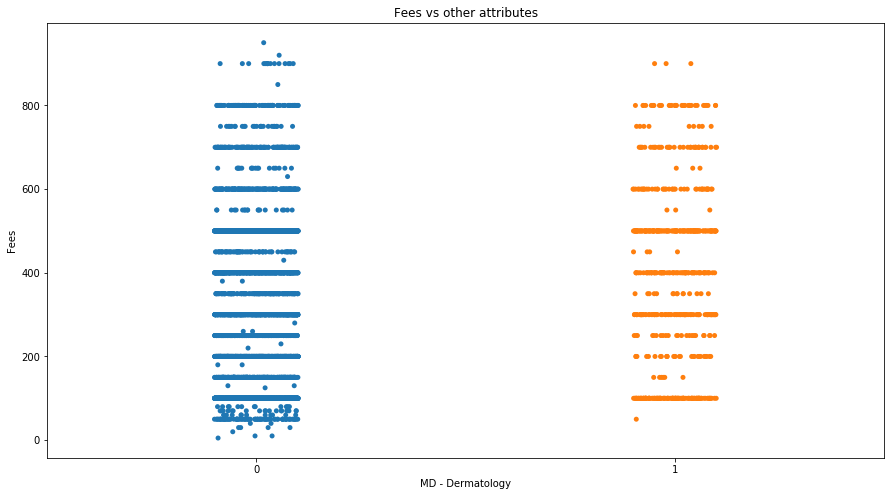

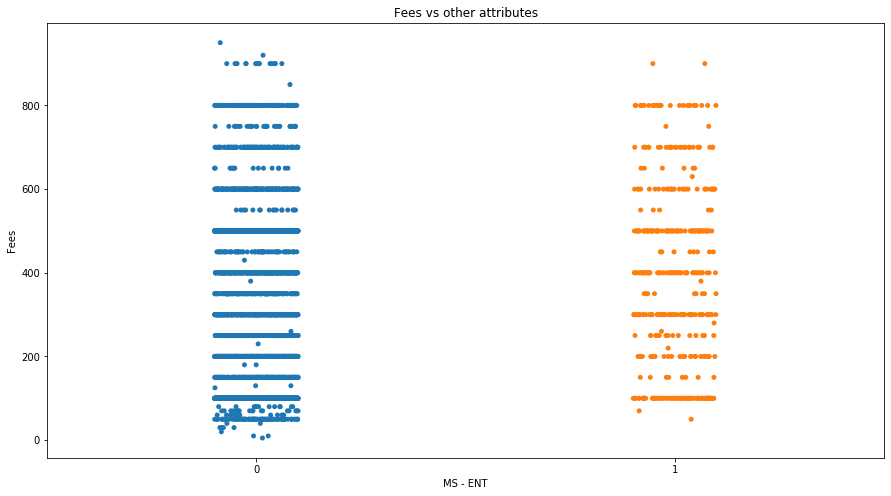

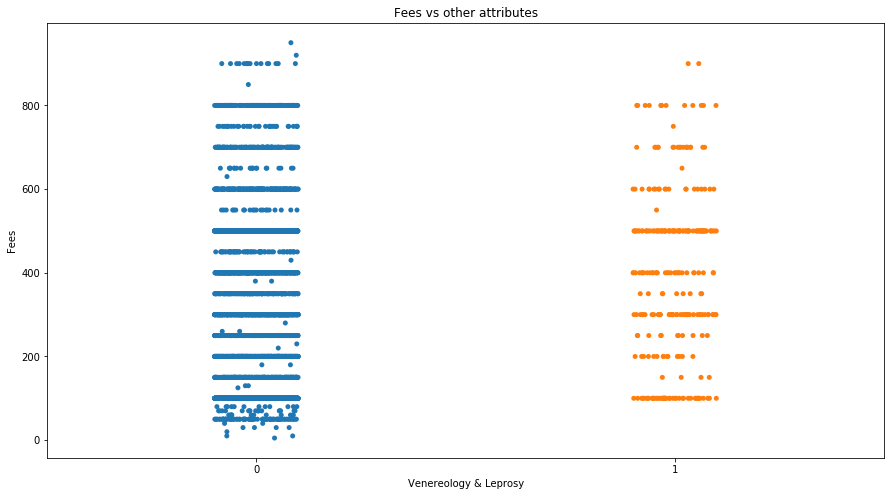

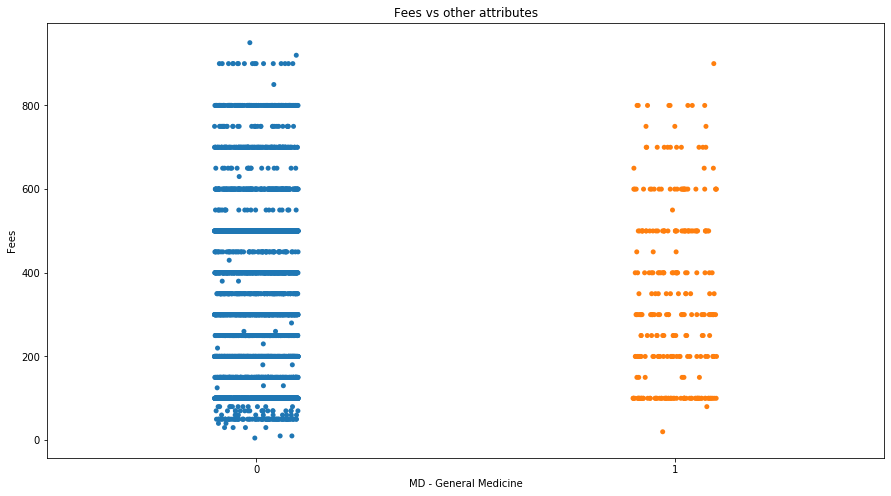

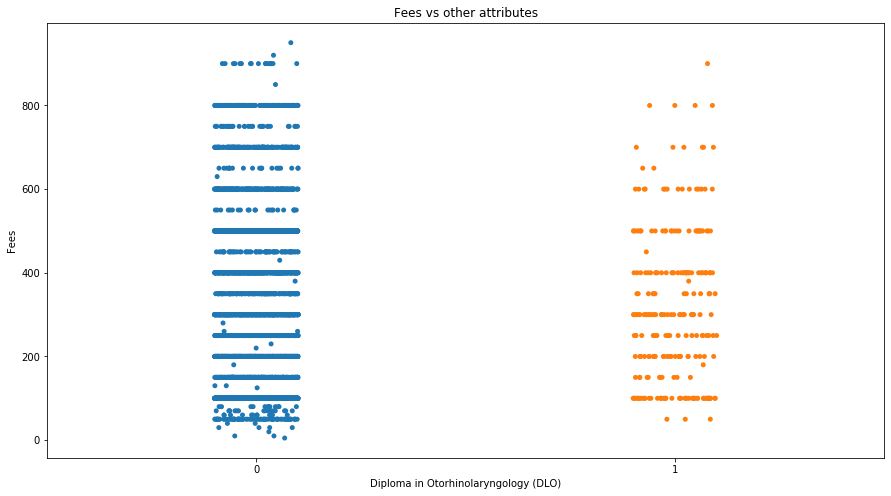

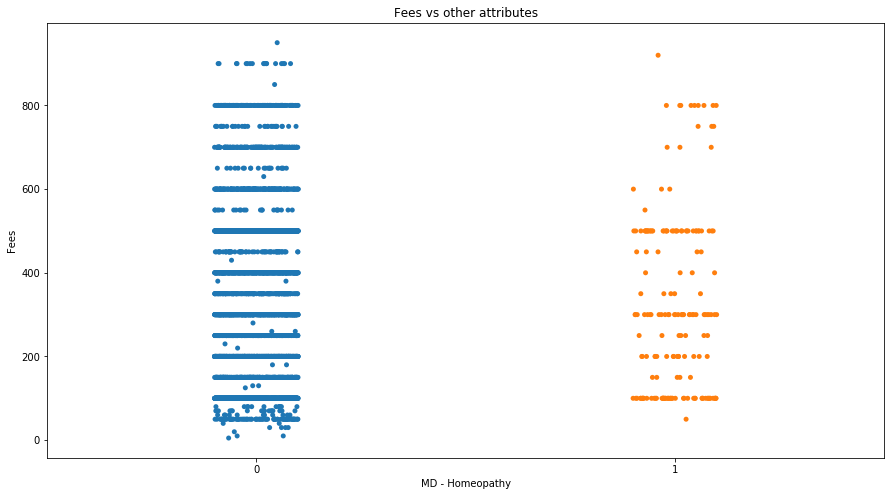

In [33]:
for i in cate_cols:                                          #bivariate analysis
    plt.figure(figsize = (15, 8))
    ax = sns.stripplot(df[i], df['Fees'])
    ax.set(xlabel = i, ylabel = 'Fees')
    plt.title('Fees vs other attributes')
    plt.show()

Ayurveda doctors seems to have lower fees than other profiles.

In the city graph, there is a bin with 'e', after checking the original data we found out that it was a typo, so we replaced that e with unknown.

In [34]:
df['City'].unique()

array(['Ernakulam', 'Bangalore', 'Chennai', 'Delhi', 'Hyderabad',
       'Coimbatore', 'Mumbai', 'Thiruvananthapuram', 'Unknown', 'e'],
      dtype=object)

In [35]:
df.loc[df['City'] == 'e']

,Rating,Profile,Fees,source,Exp,City,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
3980,0.0,Dentist,250.0,train,23.0,e,0,1,0,0,0,0,0,0,0,0


In [36]:
df.iloc[3980, df.columns.get_loc('City')] = 'Unknown'

In [37]:
df['City'].unique()

array(['Ernakulam', 'Bangalore', 'Chennai', 'Delhi', 'Hyderabad',
       'Coimbatore', 'Mumbai', 'Thiruvananthapuram', 'Unknown'],
      dtype=object)

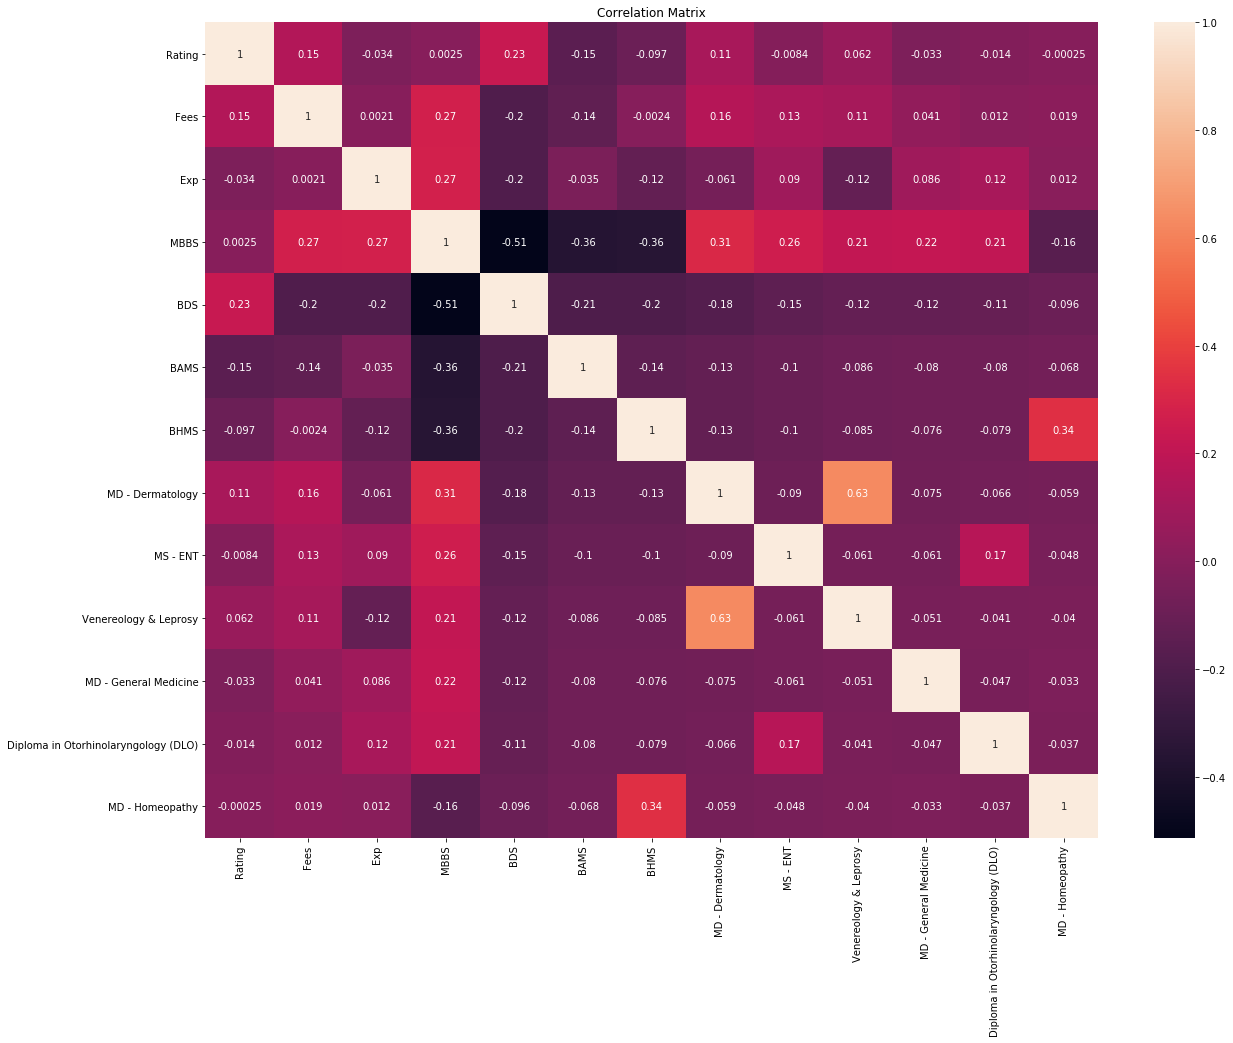

In [38]:
plt.figure(figsize = [20, 15])                             #multivariate analysis
sns.heatmap(df.corr(), annot = True)
plt.title('Correlation Matrix')
plt.show()

MBBS and Rating column seems to have the highest correlation with Fees.

In [39]:
obj = ['Profile', 'City']
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for col in obj:
    df[col] = label_encoder.fit_transform(df[col])

# Outliers and Skewness

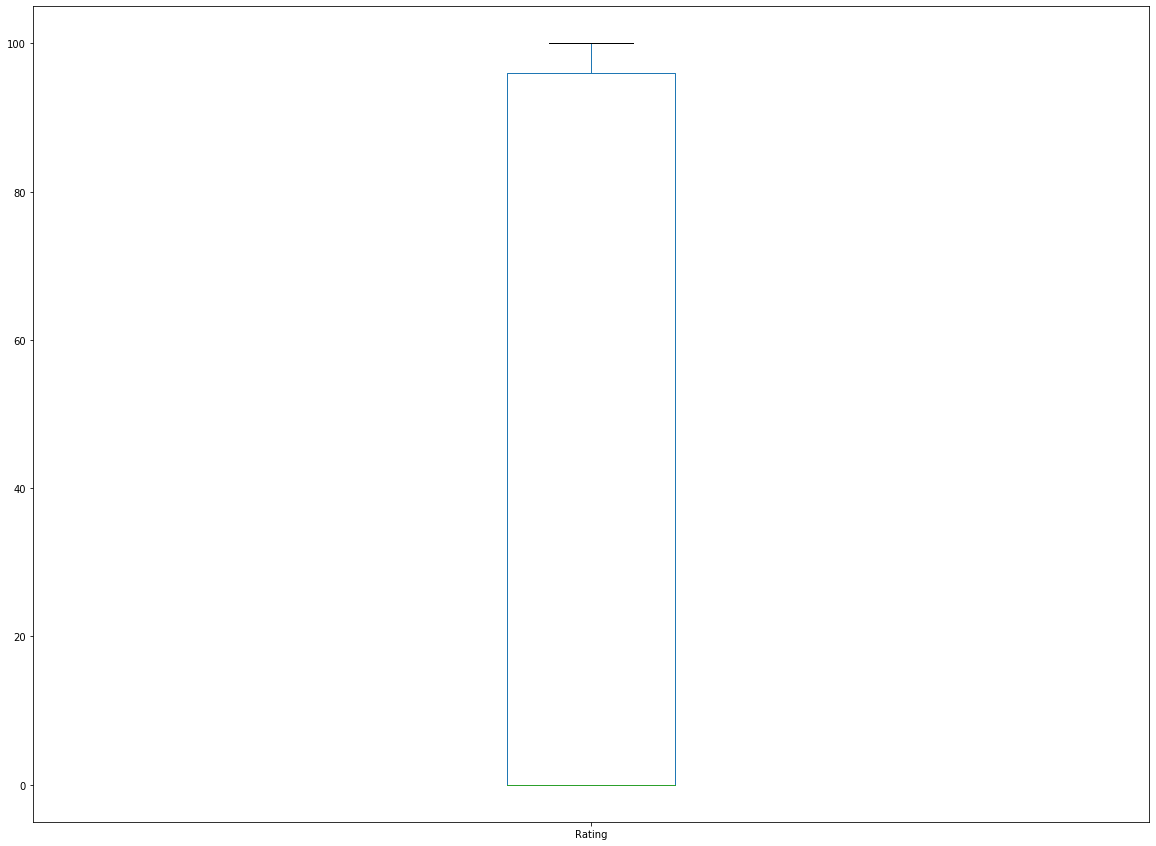

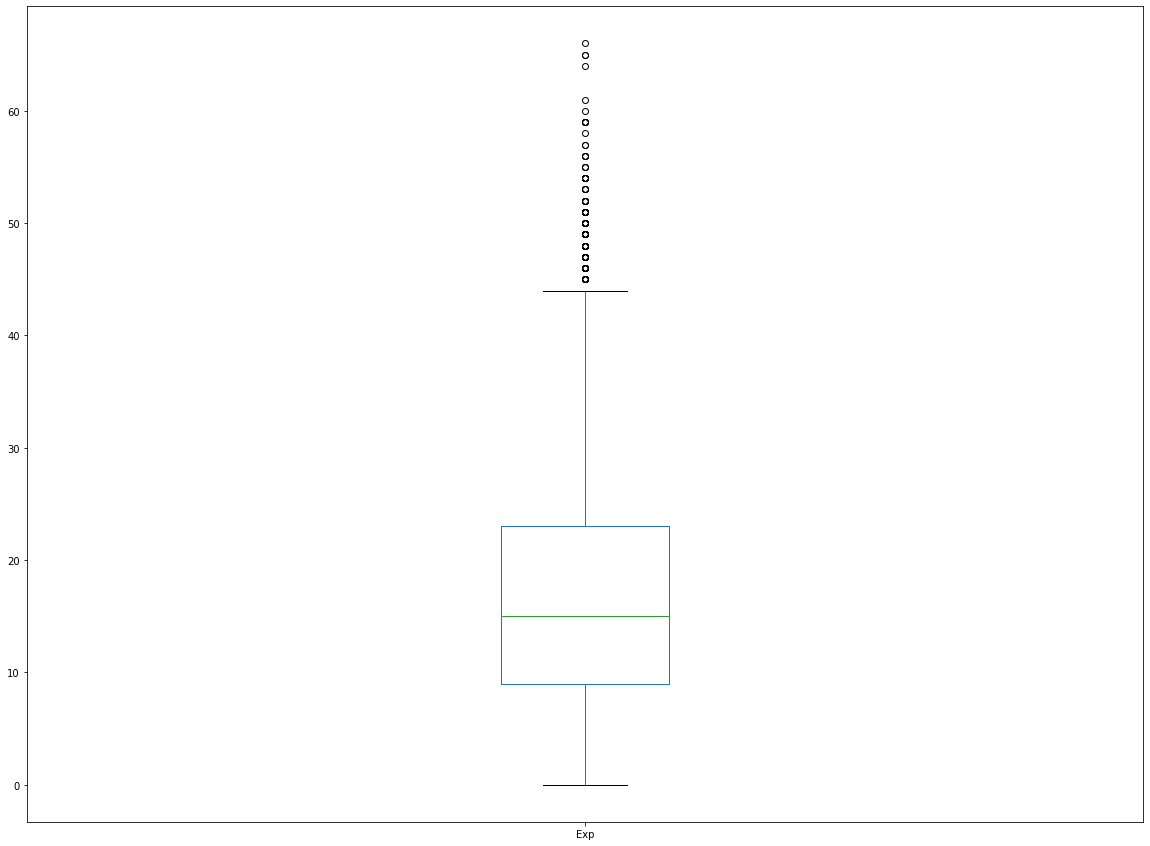

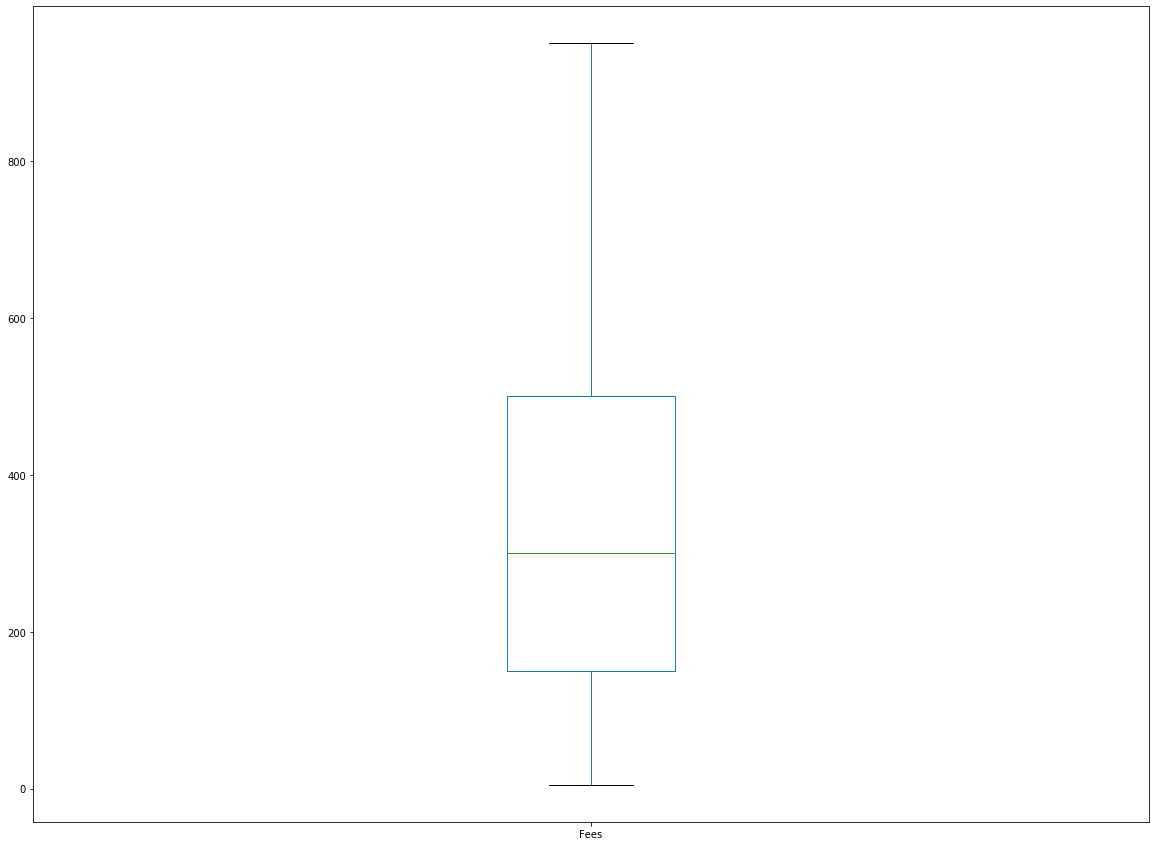

In [40]:
for i in cont_cols:
    plt.figure(figsize = (20, 15))
    df[i].plot.box()

In [41]:
df[cont_cols].skew()

Rating    0.241674
Exp       0.984224
Fees      0.751870
dtype: float64

In [42]:
cont_cols.remove('Fees')

In [43]:
df[cont_cols].skew()

Rating    0.241674
Exp       0.984224
dtype: float64

# Separating train and test from dataset

In [44]:
train = df.loc[df['source'] == 'train']
test = df.loc[df['source'] == 'test']

In [45]:
train.shape, test.shape

((5961, 16), (1987, 16))

In [46]:
train.drop('source', axis = 1, inplace = True)

In [47]:
test.drop(['source', 'Fees'], axis = 1, inplace = True)

In [48]:
x = train.drop('Fees', axis = 1)
y = train['Fees']

# Best Random State

In [49]:
def score(y_pred,y):
    y_pred = np.log(y_pred)
    y = np.log(y)
    return 1 - ((np.sum((y_pred-y)**2))/len(y))**1/2

Function to calculate Root Mean Squared Log Error (RMSLE)

In [51]:
maxrmsle = 0
maxRS = 0

for i in range (1, 500):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
    LR = LinearRegression()
    LR.fit(x_train, y_train)
    pred = LR.predict(x_test)
    rmsle = score(y_test, pred)
    if rmsle>maxrmsle:
        maxrmsle = rmsle
        maxRS = i
print ('Max RMSLE score obtained is', maxrmsle, 'on Random State', maxRS)

Max RMSLE score obtained is 0.7933636919066265 on Random State 44


# Creating train test split

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 44)

In [57]:
LR = LinearRegression()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()

models = [LR, dt, rf]
for i in models:
    print (i)
    i.fit(x_train, y_train)
    pred = i.predict(x_test)
    print (score(y_test, pred))
    print (r2_score(y_test, pred))
    print (mean_squared_error(y_test, pred, squared = False))
    print (mean_absolute_error(y_test, pred))
    

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
0.7933636919066265
0.14478661455982023
178.53783946666
141.61963691039054
DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')
0.6753203174263822
-0.427092359421553
230.63173738035348
169.78418376853256
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
            

In [58]:
for i in models:
    cvs = cross_val_score(i, x, y, cv = 5)
    print ('Cross Validation Score for ',i, ' model is :', cvs.mean())
    print (' ')

Cross Validation Score for  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)  model is : 0.12707304143829182
 
Cross Validation Score for  DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')  model is : -0.495003727269277
 
Cross Validation Score for  RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
           

Random Forest model has the least difference between R2 score and cross validation mean, hence it is the best model.

# Hypertuning

In [59]:
from sklearn.model_selection import GridSearchCV

In [60]:
rf.get_params

<bound method BaseEstimator.get_params of RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)>

In [61]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['mse', 'mae']
}

In [63]:
GCV = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3)
GCV.fit(x_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [64]:
GCV.best_params_

{'criterion': 'mse',
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 500}

In [65]:
rfr = RandomForestRegressor(random_state=44, max_features='sqrt', n_estimators= 500, max_depth=8, criterion='mse')
rfr.fit(x_train, y_train)
predrfr = rfr.predict(x_test)
print (score(y_test, predrfr))
print (r2_score(y_test, predrfr))
print (mean_squared_error(y_test, predrfr))
print (mean_absolute_error(y_test, predrfr))

0.8062903248579674
0.18849180762607232
30246.76755189791
136.03310303579832


After hypertuning the model with GridSearchCV RMSLE score increased from 0.78 to 0.81, R2 score increased from 0.02 to 0.19.

In [67]:
import pickle

filename = 'DocFeesRfr.pkl'
pickle.dump(rfr, open(filename, 'wb'))

# Conclusion

In [70]:
fitted_model = pickle.load(open('DocFeesRfr.pkl', 'rb'))

In [71]:
fitted_model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=8, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=44, verbose=0, warm_start=False)

In [72]:
test.head()

,Rating,Profile,Exp,City,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
5961,0.0,4,35.0,6,1,0,0,0,0,0,0,0,0,0
5962,0.0,3,31.0,5,1,0,0,0,0,0,0,0,1,0
5963,70.0,2,40.0,1,1,0,0,0,0,0,0,0,0,0
5964,0.0,0,0.0,3,0,0,1,0,0,0,0,0,0,0
5965,100.0,1,16.0,0,0,1,0,0,0,0,0,0,0,0


In [73]:
predictions = fitted_model.predict(test)

In [74]:
predictions

array([289.99116972, 341.27622478, 362.34406616, ..., 317.29338399,
       229.75950898, 386.55163001])